## РЕШАЮЩИЕ ДЕРЕВЬЯ ДЛЯ ЗАДАЧИ КЛАССИФИКАЦИИ



In [3]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor  #, plot_tree

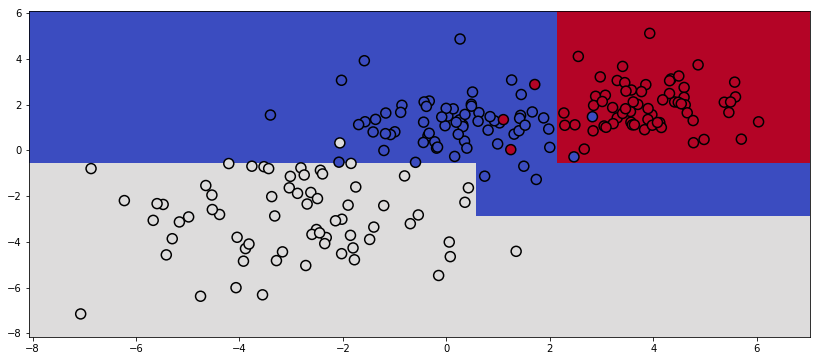

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

RANDOM_SEED = 139

train_data, train_labels = make_blobs(n_samples=200, centers=[(0,1),(-3,-3),(4,2)], 
                                      n_features=2, random_state=RANDOM_SEED,
                                      cluster_std=(1.2,1.5,1,))

# Let’s write an auxiliary function that will return grid for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, 
                                  random_state=RANDOM_SEED)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.figure(figsize=(14,6))
plt.pcolormesh(xx, yy, predicted, cmap='coolwarm')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);


Вам предложен датасет с некоторыми характеристиками банкнот, по которым мы будем определять, является ли банкнота фальшивой или настоящей.

Параметры решающего дерева, которые понадобятся для решения задачи:

- max_depth — максимальная глубина дерева.
- max_features — максимальное число признаков, по которым ищется лучшее разбиение в дереве. Это нужно потому, что при большом количестве признаков будет «дорого» искать лучшее (по критерию типа прироста информации) разбиение среди всех признаков.
- min_samples_leaf — минимальное число объектов в листе. У этого параметра есть понятная интерпретация: если он равен 5, то дерево будет порождать только те классифицирующие правила, которые верны как минимум для 5 объектов.

In [5]:
data = pd.read_csv('./Unit_6_data/bill_authentication.csv')

In [6]:
X = data.drop(columns='Class')
y = data.Class

### Задание 5.2.3
Обучите на предложенных данных решающее дерево.   
Целевой переменной здесь является переменная Class.  
Размер тестовой выборки возьмите за 0.2, random_state = 17 для разбиения и дерева.   
Максимальную глубину дерева примите за 3 , максимальное число признаков, по которым ищется лучшее разбиение в дереве — за 2.  
Какое значение f1-score вы получили? Округлите до трёх знаков после точки-разделителя.

In [7]:
RANDOM_SEED = 17
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=RANDOM_SEED)
classifier = DecisionTreeClassifier(max_depth=3,max_features=2,random_state=RANDOM_SEED)

In [8]:
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
metrics =  f1_score(y_pred,y_test)
round(metrics,3)

0.866

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17, test_size=0.2)
model = DecisionTreeClassifier(max_depth=3, max_features = 2,random_state=17)
model.fit(X_train,y_train)
f1_score(y_test, model.predict(X_test))

0.8663967611336032

### Задание 5.2.4
Проклассифицируйте банкноту с вектором признаков 2.04378,-0.38422,1.437292,0.76421. К какому классу она относится?

In [10]:
[[2.04378,-0.38422,1.437292,0.76421]]

[[2.04378, -0.38422, 1.437292, 0.76421]]

In [11]:
classifier.predict([[2.04378,-0.38422,1.437292,0.76421]])

array([0], dtype=int64)

Здесь приведена визуализация того, как одно решающее дерево разделяет выборку, состоящую из трёх классов.

Видно, что решающее дерево может очень неплохо отделить каждый класс от всех остальных. Разделяющая поверхность каждого класса кусочно-постоянная, и при этом каждая сторона поверхности параллельна оси координат, так как каждое условие сравнивает значение ровно одного признака с порогом.

В то же время решающее дерево вполне может переобучиться: его можно сделать настолько глубоким, что каждый лист решающего дерева будет соответствовать ровно одному объекту обучающей выборки. В этом случае, если записать в каждом листе ответ соответствующего объекта, на обучающей выборке получается нулевая ошибка. Дерево получается явно переобученным. Пример такого дерева:

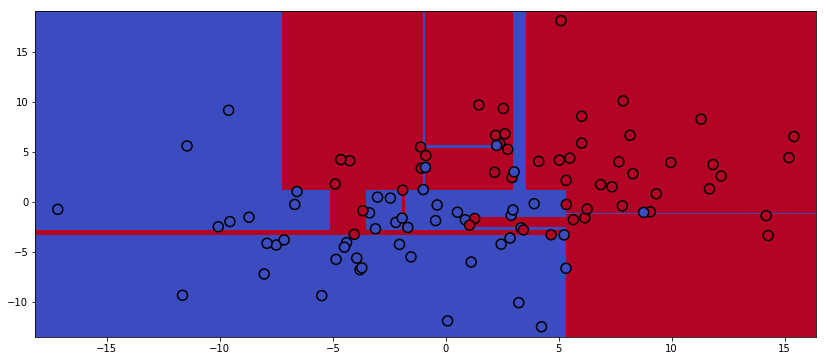

In [12]:
RANDOM_SEED = 139

train_data, train_labels = make_blobs(n_samples=100, centers=[(-3,-3),(4,2)], 
                                      n_features=2, random_state=RANDOM_SEED,
                                      cluster_std=(5,5))


clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=None, 
                                  random_state=RANDOM_SEED)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.figure(figsize=(14,6))
plt.pcolormesh(xx, yy, predicted, cmap='coolwarm')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);

## РЕШАЮЩИЕ ДЕРЕВЬЯ В ЗАДАЧЕ РЕГРЕССИИ

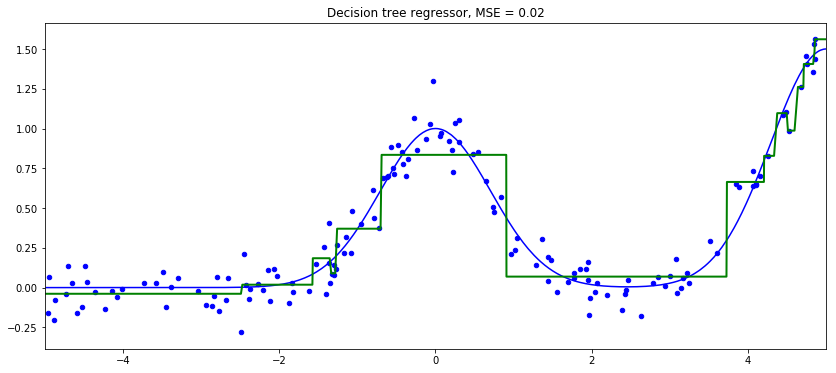

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

RANDOM_SEED = 139

n_train = 150        
n_test = 1000       
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 5) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 5) ** 2) + \
    np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=4, random_state=RANDOM_SEED)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(14, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % np.mean((y_test - reg_tree_pred) ** 2))
plt.show()

Потренируемся реализовывать задачу регрессии с помощью решающих деревьев на реальных данных. В данной задаче мы попробуем предсказать потребление топлива.

### Задание 5.2.5
Обучите решающее дерево для регрессии на предложенных данных, размер тестовой выборки возьмите за 0.3, random_state = 42 для разбиения и дерева.  
Вычислите RMSE, округлите до двух знаков после точки-разделителя.  
Какова глубина дерева?


In [14]:
df = pd.read_csv('./Unit_6_data/petrol_consumption.csv')

X = df.drop(columns='Petrol_Consumption')
y = df.Petrol_Consumption

regressor = DecisionTreeRegressor( random_state = 42)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

metrics = np.sqrt(mean_squared_error(y_pred,y_test))
round(metrics,2)

87.97

In [16]:
regressor.tree_.max_depth

11

In [17]:
plt.figure(figsize=(26,14))
# plot_tree(regressor);

<Figure size 1872x1008 with 0 Axes>

<Figure size 1872x1008 with 0 Axes>

In [18]:
plt.figure(figsize=(26,14))
# plot_tree(classifier);

<Figure size 1872x1008 with 0 Axes>

<Figure size 1872x1008 with 0 Axes>

### ЗАДАЧА О ВИНАХ
Реализуем бэггинг для деревьев решений. Для тренировки будем использовать датасет о винах. 

Для начала подготовим данные к классификации. Условно разделим вино на хорошее и нет. Хорошим вином будем называть вино, параметр quality которого не менее 6.

Теперь сравним несколько методов классификации: логистическую регрессию, решающее дерево и бэггинг.

Разбейте выборку на обучающую и тренировочную с параметрами test_size=0.30, random_state=42.

Обучите два классификатора:   
логистическую регрессию (с дефолтными параметрами)    
и решающее дерево (random_state=42, максимальная глубина равна 10).

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [20]:
wine = pd.read_csv('./Unit_6_data/winequality-red.csv', sep=';')

X = wine.drop(columns='quality')
y = wine.quality.ge(6).astype(np.dtype('int8'))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

LR = LogisticRegression()
DTC = DecisionTreeClassifier(max_depth=10, random_state=42)

LR.fit(X_train,y_train)
DTC.fit(X_train,y_train)

pred_lr = LR.predict(X_test)
pred_dtc = DTC.predict(X_test)

### Задание 5.5.2
Введите значение f1 score для классификатора, который показал наилучшее значение. Округлите до трёх знаков после точки-разделителя.

In [21]:
round(max(f1_score(y_test,pred_lr),f1_score(y_test,pred_dtc)),3)

0.793

Обучите модель с использование бэггинга (функция BaggingClassifier с random_state=42, разделение выборки на обучающую и тренировочную с параметрами test_size=0.30, random_state=42) для алгоритма, показавшего лучшее качество, определите количество моделей  
1500
 . Вычислите новое значение f1-score.

In [22]:
from sklearn.ensemble import BaggingClassifier

In [23]:
base_estimator = LR if f1_score(y_test,pred_lr) > f1_score(y_test,pred_dtc) else DTC

BC = BaggingClassifier(base_estimator=base_estimator,n_estimators=1500,random_state=42)

In [24]:
BC.fit(X_train,y_train)
f1_score(y_test,BC.predict(X_test))

0.8150943396226414

## АЛГОРИТМ ПОСТРОЕНИЯ СЛУЧАЙНОГО ЛЕСА, СОСТОЯЩЕГО ИЗ ДЕРЕВЬЕВ

Для каждого:

- сгенерировать выборку с помощью бутстрэпа;  
- построить решающее дерево по выборке: по заданному критерию мы выбираем лучший признак, делаем разбиение в дереве по нему и так до исчерпания выборки → дерево строится, пока в каждом листе не более объектов или пока не достигнем определенной высоты дерева → при каждом разбиении сначала выбирается несколько случайных признаков из исходных, и оптимальное разделение выборки ищется только среди них.
Итоговый классификатор  $a(x)= \frac {1}{N} \sum_{i=1}^{N} b_i(x)$
 , иными словами — для задачи классификации мы выбираем решение голосованием по большинству, а в задаче регрессии — средним.

Рекомендуется в задачах классификации брать  $m= \sqrt{(n)}$
 , а в задачах регрессии —  $m= \frac{n}{3}$, где  n — число признаков. Также рекомендуется в задачах классификации строить каждое дерево до тех пор, пока в каждом листе не окажется по одному объекту, а в задачах регрессии — пока в каждом листе не окажется по пять объектов.

Таким образом, случайный лес — это бэггинг над решающими деревьями, при обучении которых для каждого разбиения признаки выбираются из некоторого случайного подмножества признаков.

## РЕАЛИЗАЦИЯ НА PYTHON  И ПОДБОР ПАРАМЕТРОВ
Теперь обучим случайный лес на простых данных и посмотрим, как можно подбирать параметры случайного леса для достижения наилучшего качества модели.

Потренируемся на данных, по которым мы будем предсказывать погоду. 

Откроем их, удалим признаки, не относящиеся к предсказанию (от дня недели, например, или от года погода не зависит), разделим на тестовую и обучающуюся выборки:

In [25]:
weather=pd.read_csv('./Unit_6_data/temps_extended.csv')
y = weather['actual']
X = weather.drop(['actual','weekday','month','day','year'],axis =1)
X_train, X_val, Y_train,Y_val=train_test_split(X,y,test_size=0.3, random_state=42)

Попробуем подобрать гиперпараметры таким образом, чтобы получить оптимальный результат.

Если мы запускаем случайный лес без настройки параметров, то по умолчанию они следующие:

In [26]:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Параметры по умолчанию:\n')
pprint(rf.get_params())

Параметры по умолчанию:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Попробуем подбирать разные значения для некоторых параметров. Для перебора вариантов возьмем следующие параметры:

- n_estimators 
- max_features 
- max_depth 
- min_samples_split 
- min_samples_leaf
- bootstrap

Мы можем сами указать, какие значения гиперпараметров надо перебрать.

Зададим сетку гиперпараметров, которые будут перебираться:

In [27]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

Обучим наш лес:

In [28]:
%%time
rf = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   59.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.0min finished


Wall time: 8min 4s


Давайте посмотрим, какие гиперпараметры нам предлагают как оптимальные:


In [29]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

### Задание 5.6.1
Обучите случайный лес с предустановленными параметрами и теми параметрами, которые мы отобрали как оптимальные. В обоих вариантах поставьте random_state =42. Какое улучшение MSE дала подстановка отобранных гиперпараметров?

In [37]:
'''rf = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(estimator=rf, 
                               param_distributions=random_grid, 
                               n_iter=100, 
                               cv=3, 
                               verbose=2, 
                               random_state=42,
                               n_jobs=-1)
rf_random.fit(X_train, Y_train)''';

In [38]:
rf = RandomForestRegressor(random_state=42)
rf_searced = RandomForestRegressor(n_estimators=1000,
                                  min_samples_split=5,
                                  min_samples_leaf=2,
                                  max_features='sqrt',
                                  max_depth=10,
                                  bootstrap=True,
                                  random_state=42)

In [40]:
rf.fit(X_train,Y_train)
rf_searced.fit(X_train,Y_train)

pred_rf = rf.predict(X_val)
pred_rf_searced = rf_searced.predict(X_val)

mse_dif = mean_squared_error(Y_val,pred_rf) -  mean_squared_error(Y_val,pred_rf_searced)

In [42]:
round(mse_dif,1)

3.2

In [ ]:
'''rf = RandomForestRegressor(random_state=42)
rf_searced = RandomForestRegressor(n_estimators=600,
                                  min_samples_split=10,
                                  min_samples_leaf=2,
                                  max_features='sqrt',
                                  max_depth=60,
                                  bootstrap=True,
                                  random_state=42)
                                  ''';

In [ ]:
'''rf.fit(X_train,Y_train)
rf_searced.fit(X_train,Y_train)

pred_rf = rf.predict(X_val)
pred_rf_searced = rf_searced.predict(X_val)

mean_squared_error(Y_val,pred_rf) -  mean_squared_error(Y_val,pred_rf_searced)
''';

## 5.7. Практика
Разберёмся с ансамблями алгоритмов и со случайным лесом. Рассмотрим данные о сотрудниках компании, где указывается, ушёл сотрудник или нет.

Сделаем базовую предобработку данных: удалим признак, который отвечает за идентификатор пользователя как нерепрезетативный признак.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('./Unit_6_data/HR-dataset.csv')

np.random.seed(42)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

target = 'left'
features = df.columns.drop(target)
features = features.drop('empid')  # Удалим идентификатор пользователя как нерепрезентативный признак
print(features)

X, y = df[features].copy(), df[target]

Заменим идентификатор отдела, к которому относился сотрудник, на количество людей в отделе, а зарплату — на ординальную категорию. Масштабируем признаки для последующего сравнения результатов.

In [ ]:
salary_ordinals = {'low': 1, 'medium': 2, 'high': 3}

X['dept'] = X['dept'].apply(X['dept'].value_counts().get)
X['salary'] = X['salary'].apply(salary_ordinals.get)

 Масштабируем признаки для последующего сравнения результатов.

In [ ]:
scaler = StandardScaler()
X = pd.DataFrame(data=scaler.fit_transform(X), columns=X.columns)

В дальнейшем будем оценивать качество модели на кросс-валидации на пяти фолдах при помощи точности (accuracy).

In [ ]:
def estimate_accuracy(clf, X, y, cv=5):
    return cross_val_score(clf, X, y, cv=5, scoring='f1').mean()

Посмотрим на то, как работает бэггинг над решающими деревьями.
##### Бэггинг (bagging, сокр. от bootstrap aggregating)  — метод построения композиции алгоритмов, в котором каждый алгоритм строится независимо от других на подвыборках обучающей выборки. Итоговый алгоритм принимает решения посредством голосования среди всех алгоритмов (возвращается самый частый ответ).
Посмотрим на точность одного дерева.

In [ ]:
tree = DecisionTreeClassifier(max_depth=30)
print("Decision tree:", estimate_accuracy(tree, X, y))

Проведём бэггинг: для этого достаточно обернуть исходный классификатор в BaggingClassifier.



In [ ]:
bagging_trees = BaggingClassifier(tree)
print("Decision tree bagging:", estimate_accuracy(bagging_trees, X, y))

Композиция отдельных деревьев показывает себя лучше, чем одно дерево. Структура дерева серьёзно зависит от обучающей выборки. Это значит, что если немного изменить обучающую выборку, то дерево сильно изменится. Бэггинг идеально подходит в этом случае, поскольку композиция алгоритмов при помощи голосования работает наилучшим образом, когда модели различны.

Увеличить различность построенных деревьев можно, указав параметры max_features и max_depth.

In [ ]:
random_tree = DecisionTreeClassifier(max_features=int(np.sqrt(len(features))), max_depth=30)
print("Random tree:", estimate_accuracy(random_tree, X, y))

In [ ]:
bagging_random_trees = BaggingClassifier(random_tree)
print("Random tree bagging:", estimate_accuracy(bagging_random_trees, X, y))

Именно так внутри и работает так называемый случайный лес (Random Forest): он обучает набор деревьев (параметр n_esimators), каждое из которых обучается на подмножестве признаков (Random Subspaces) и на подмножестве объектов (bootstrap). То есть случайный лес получается случайным по двум этим параметрам, а ответы аггрегируются при помощи голосования.

**Стандартная эвристика:  
в задаче классификации брать квадратный корень числа признаков,   
а в задаче регрессии — треть числа признаков.**



In [ ]:
random_forest = RandomForestClassifier(
    n_estimators=100,
    n_jobs=-1,
    max_features=int(np.sqrt(len(features))),
    max_depth=30)
print("Random Forest:", estimate_accuracy(random_forest, X, y))

Ещё одно преимущество использования бэггинга для аггрегации моделей — получение оценки работы классификатора без дополнительного проведения кросс-валидации при помощи out-of-bag score. Это метод вычисления произвольной оценки качества во время обучения бэггинга. Для подсчёта требуется указать параметр oob_score = True, что имеет смысл при достаточном количестве деревьев.

In [ ]:
random_forest = RandomForestClassifier(
    n_estimators=100,
    max_features=int(np.sqrt(len(features))),
    max_depth=30,
    oob_score=True,
    n_jobs=-1
)
random_forest.fit(X, y)
random_forest.oob_score_.mean()

Метод бэггинга можно применять к произвольным алгоритмам, например, к логистической регрессии. 

In [ ]:
lr = LogisticRegression(solver='saga', max_iter=200)
lr.fit(X, y)
print("LR:", estimate_accuracy(lr, X, y))

In [ ]:
random_logreg = BaggingClassifier(
    lr,
    n_estimators=10,
    n_jobs=-1,
    random_state=42
)
print("Bagging for LR:", estimate_accuracy(random_logreg, X, y))

В её случае он не так сильно повышает качество, поскольку линейные модели не так сильно зависят от состава обучающей выборки. Попробуем убрать часть признаков.

In [ ]:
random_logreg = BaggingClassifier(
    lr,
    n_estimators=10,
    n_jobs=-1,
    max_features=0.5,
    random_state=42
)
print("Bagging for LR:", estimate_accuracy(random_logreg, X, y))

В случае линейной регрессии повышение разнообразности моделей не дает такого прироста, как с деревьями, поскольку модели сильно теряют в качестве. Случайный лес на примере нашей задачи справляется лучше.

Сравнение логистической регрессии и случайного леса:

In [ ]:
def plot_predictions(X, y, clf, proba=False, points_size=7, xlabel='x', ylabel='y'):
    """Fits the classifier on the data (X, y) and plots the result on a 2-D plane."""
    def get_grid(data):
        x_std, y_std = data.std(axis=0)
        x_min, x_max = data[:, 0].min() - x_std / 2, data[:, 0].max() + x_std / 2
        y_min, y_max = data[:, 1].min() - y_std / 2, data[:, 1].max() + y_std / 2
        return np.meshgrid(np.linspace(x_min, x_max, num=200),
                           np.linspace(y_min, y_max, num=200))
    
    clf.fit(X, y)
    xx, yy = get_grid(X)
    if proba:
        predicted = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
    else:
        predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        
    plt.figure(figsize=(10.0, 10.0))
    plt.pcolormesh(xx, yy, predicted, cmap=plt.cm.coolwarm, alpha=0.1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=points_size, cmap=plt.cm.coolwarm, alpha=0.90)
    plt.ylim([yy.min(),yy.max()])
    plt.xlim([xx.min(),xx.max()])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    return clf

## ПРАКТИКА

1. Загрузите датасет digits с помощью функции load_digits из sklearn.datasets и подготовьте матрицу признаков X и ответы на обучающей выборке  y (вам потребуются поля data и target в объекте, который возвращает load_digits). 

2. Информацию о датасете вы можете получить, обратившись к полю DESCR у возвращаемого объекта load_digits. Нам предстоит решать задачу классификации изображений с цифрами по численным признакам.

3. Для оценки качества мы будем использовать cross_val_score из sklearn.model_selection с параметром  cv=10. Эта функция реализует k-fold cross validation c k равным значению параметра cv. Предлагается использовать  k=10, чтобы полученные оценки качества имели небольшой разброс, и было проще проверить полученные ответы. На практике же часто хватает и  k=5. Функция cross_val_score будет возвращать numpy.ndarray, в котором будет  k чисел — качество в каждом из  k экспериментов k-fold cross validation. Для получения среднего значения (которое и будет оценкой качества работы) вызовите метод .mean() у массива, который возвращает cross_val_score.

С небольшой вероятностью вы можете натолкнуться на случай, когда полученное вами качество в каком-то из пунктов не попадёт в диапазон, заданный для правильных ответов — в этом случае попробуйте перезапустить ячейку с cross_val_score несколько раз и выбрать наиболее «типичное» значение. Если это не помогает, то где-то была допущена ошибка.

Чтобы ускорить вычисление cross_val_score, следует попробовать использовать параметр n_jobs. Число, которое вы подаёте в качестве этого параметра, соответствует количеству потоков вашего процессора, которое будет задействовано в вычислении. Если указать n_jobs = -1, тогда будут задействовано максимальное число потоков.

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()

In [ ]:
X = digits.data
y = digits.target

### Задание 5.7.1
#### 1. Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы с помощью cross_val_score.

Эту величину введите в поле для ответа (ваше значение должно попасть в заданный интервал).

In [ ]:
tree = DecisionTreeClassifier()

scores = cross_val_score(tree,X,y,cv=10)
scores.mean()

#### 2. Теперь давайте обучим BaggingClassifier на основе DecisionTreeClassifier. Из sklearn.ensemble импортируйте BaggingClassifier, все параметры задайте по умолчанию. Нужно изменить только количество базовых моделей, задав его равным  100.

В поле для ответа введите качество бэггинга на нашем датасете (ваше значение должно попасть в заданный интервал).

Подумайте, какие выводы можно сделать из соотношения качества одиночного дерева и бэггинга деревьев?

In [ ]:
bagging_trees = BaggingClassifier(base_estimator=tree,n_estimators=100)

scores = cross_val_score(bagging_trees,X,y,cv=10)
scores.mean()

#### 3. Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех d признаках, а на √d случайных признаках.

В поле для ответа введите качество работы получившегося классификатора (ваше значение должно попасть в заданный интервал).

Корень из числа признаков — часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три,  log d тоже имеет место быть. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков, добиваясь лучшего качества на кросс-валидации.

In [ ]:
max_features  = int(np.sqrt(X.shape[1]))
bootstrap_bagging_trees = BaggingClassifier(base_estimator=tree,n_estimators=100,
                                            bootstrap_features=True,max_features=max_features)
scores = cross_val_score(bootstrap_bagging_trees,X,y,cv=10)
scores.mean()

#### 4. В предыдущем пункте мы выбирали подмножество один раз для каждого очередного дерева. Следующим нашим шагом будет построение бэггинга на основе деревьев, которые выбирают случайное подможество признаков для каждой вершины дерева.

Для этого нам потребуется перенести отвечающий за это параметр из BaggingClassifier в DecisionTreeClassifier. Для этого вам из документации нужно выяснить, какой параметр DecisionTreeClassifier за это отвечает.

В поле для ответа введите значение этого параметра (ваше значение должно попасть в заданный интервал).

По-прежнему сэмплируем  sqrt(d)  признаков.

In [ ]:
bootstrap_tree = DecisionTreeClassifier(max_features=max_features)
bagging_bootstrap_trees = BaggingClassifier(base_estimator=bootstrap_tree,n_estimators=100)

scores = cross_val_score(bagging_bootstrap_trees,X,y,cv=10)
scores.mean()

### Задание 5.7.2
Полученный в задании 4 классификатор — бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму `Random Forest`, поэтому почему бы не сравнить качество работы классификатора с `RandomForestClassifier` из `sklearn.ensemble`?

Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева.

Для наглядности лучше построить графики зависимости качества от значений параметров, но для сдачи задания это делать не обязательно.

In [ ]:
random_forest = RandomForestClassifier(n_estimators=1000,max_features=max_features)

scores = cross_val_score(random_forest,X,y,cv=10)
scores.mean()

In [ ]:
# количества деревьев
scoring_mean = pd.Series([])
scoring_std = pd.Series([])
param_grid = np.logspace(1,4,7,dtype=int)

for param in param_grid:
    researched = RandomForestClassifier(n_estimators=param)
    scoring_mean[param] = cross_val_score(researched,X,y,cv=5).mean()
    scoring_std[param] = cross_val_score(researched,X,y,cv=5).std()

plt.figure(figsize=(14,5))
plt.grid(True)
plt.xticks(param_grid)
plt.xscale('log')
plt.errorbar(param_grid, scoring_mean , yerr = scoring_std, fmt='o-')

plt.title('Зависимость качества от количества деревьев')
plt.ylabel('качество')
plt.xlabel('количество деревьев');

In [ ]:
# количества признаков, выбираемых при построении каждой вершины дерева
scoring_mean = pd.Series([])
scoring_std = pd.Series([])
param_grid = np.linspace(1,X.shape[1],20,dtype=int)

for param in param_grid:
    researched = RandomForestClassifier(n_estimators=10,max_features=param)
    scoring_mean[param] = cross_val_score(researched,X,y,cv=5).mean()
    scoring_std[param] = cross_val_score(researched,X,y,cv=5).std()

plt.figure(figsize=(14,5))
plt.grid(True)
plt.xticks(param_grid)
plt.errorbar(param_grid, scoring_mean , yerr = scoring_std, fmt='o-')

plt.title('Зависимость качества от количества признаков, выбираемых при построении каждой вершины дерева')
plt.ylabel('качество')
plt.xlabel('количество признаков');

In [ ]:
# а также ограничений на глубину дерева
scoring_mean = pd.Series([])
scoring_std = pd.Series([])
# param_grid = np.linspace(1,X.shape[1],20,dtype=int)
param_grid = range(1,51)

for param in param_grid:
    researched = RandomForestClassifier(n_estimators=10,max_depth=param)
    scoring_mean[param] = cross_val_score(researched,X,y,cv=5).mean()
    scoring_std[param] = cross_val_score(researched,X,y,cv=5).std()

plt.figure(figsize=(14,5))
plt.grid(True)
plt.xticks(param_grid)
plt.errorbar(param_grid, scoring_mean , yerr = scoring_std, fmt='o-')

plt.title('Зависимость качества от ограничений на глубину дерева')
plt.ylabel('качество')
plt.xlabel('ограничение на глубину дерева');